In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from PIL import Image
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import roc_curve, auc

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier
from sklearn.neural_network import MLPClassifier

In [5]:
# Path to the dataset
dataset_path = r"C:\Users\mat\Documents\VERITASIUM PROTOTYPE\train"

# Initialize lists for images and labels
images = []
labels = []

# Iterate through 'fake' and 'real' folders
for label in ['fake', 'real']:
    folder_path = os.path.join(dataset_path, label)
    for img_name in os.listdir(folder_path):
        img_path = os.path.join(folder_path, img_name)
        try:
            # Load the image and resize to a fixed size (e.g., 64x64)
            img = Image.open(img_path).resize((64, 64))
            img_array = np.array(img)  # Convert image to a NumPy array
            images.append(img_array)  # Append image data
            labels.append(label)      # Append label
        except Exception as e:
            print(f"Error loading {img_path}: {e}")

# Convert lists to NumPy arrays
X = np.array(images)
y = np.array([1 if label == 'real' else 0 for label in labels])  # Convert labels to binary (1 for 'real', 0 for 'fake')

print(f"Loaded {len(X)} images and {len(y)} labels.")

Loaded 1795 images and 1795 labels.


In [6]:
# Normalize pixel values to [0, 1]
X = X / 255.0

# Flatten images (if using traditional ML models)
X_flat = X.reshape(X.shape[0], -1)

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_flat, y, test_size=0.2, random_state=42)

print(f"Training data shape: {X_train.shape}")
print(f"Test data shape: {X_test.shape}")

Training data shape: (1436, 12288)
Test data shape: (359, 12288)


1 - LogisticRegression accuracy: 82.1727 %
2 - KNeighborsClassifier accuracy: 71.30919 %
3 - SVC accuracy: 88.02228 %
4 - GaussianNB accuracy: 61.00279 %
5 - BernoulliNB accuracy: 51.81058 %
6 - DecisionTreeClassifier accuracy: 69.08078 %
7 - RandomForestClassifier accuracy: 82.72981 %
8 - ExtraTreesClassifier accuracy: 84.95822 %
9 - AdaBoostClassifier accuracy: 75.20891 %
10 - MLPClassifier accuracy: 81.6156 %


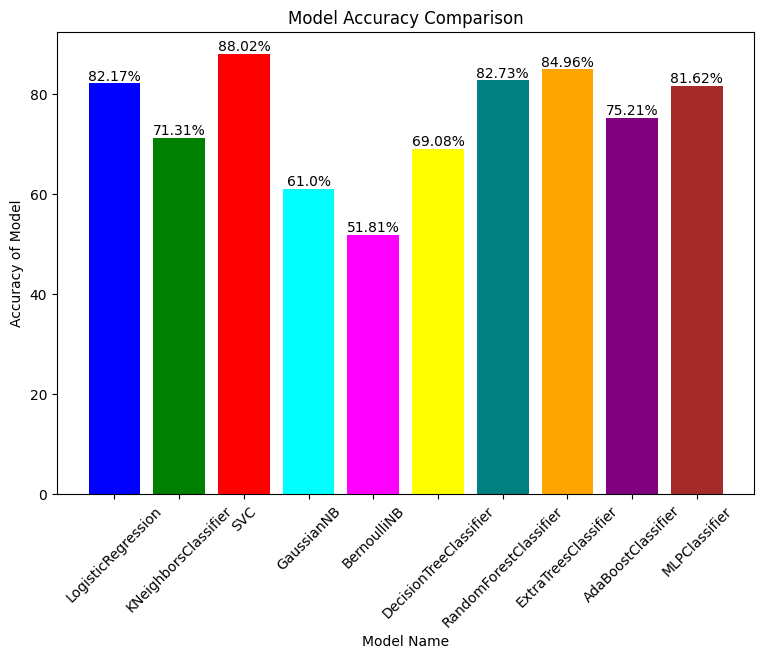

In [7]:
# Define models
models = [
    LogisticRegression(solver='liblinear', max_iter=2000),KNeighborsClassifier(), SVC(), GaussianNB(),
    BernoulliNB(), DecisionTreeClassifier(), RandomForestClassifier(),
    ExtraTreesClassifier(), AdaBoostClassifier(n_estimators=50, algorithm='SAMME'),
    MLPClassifier(max_iter=2000)
]

# Initialize lists for storing results
name = []
results = []
count = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
c = -1

# Train and evaluate each model
for i in models:
    c += 1
    reg = i.fit(X_train, y_train)
    m_name = reg.__class__.__name__
    y_pred = reg.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred) * 100
    
    name.append(m_name)
    results.append(accuracy)
    
    print(count[c], '-', m_name, 'accuracy:', round(accuracy, 5), '%')

# Plot the accuracies
plt.figure(figsize=(9, 6))
bars = plt.bar(name, results, color=['blue', 'green', 'red', 'cyan', 'magenta', 'yellow', 'teal', 'orange', 'purple','brown'])
plt.xticks(rotation=45)
plt.xlabel('Model Name')
plt.ylabel('Accuracy of Model')
plt.title('Model Accuracy Comparison')

for bar, result in zip(bars, results):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{round(result, 2)}%', 
             ha='center', va='bottom')

plt.show()

In [8]:
#Selected the model with the highest accuracy to check the prediction
f = SVC(kernel='rbf', random_state=42, probability=True).fit(X_train, y_train)
y_pred_f = f.predict(X_test)
accuracy_f = accuracy_score(y_test, y_pred_f)
print('Model with Highest Accuracy: ',round(accuracy, 2),'%') 

Model with Highest Accuracy:  81.62 %


In [9]:
#Prints the classification report for further analysis
print(classification_report(y_test, y_pred_f))

              precision    recall  f1-score   support

           0       0.86      0.91      0.88       180
           1       0.90      0.85      0.88       179

    accuracy                           0.88       359
   macro avg       0.88      0.88      0.88       359
weighted avg       0.88      0.88      0.88       359



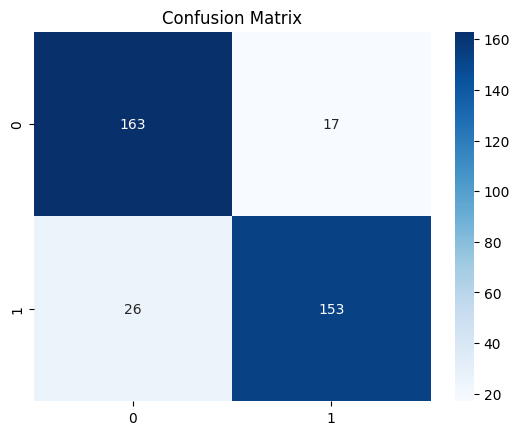

In [10]:
# Assuming y_test and y_pred_f are your actual and predicted labels, respectively
conf_matrix = confusion_matrix(y_test, y_pred_f)

# Plot confusion matrix as heatmap
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')

# Add labels and title
plt.title('Confusion Matrix')

# Show plot
plt.show()

In [11]:
#Instantiates the roc_auc curve in for better representation of data in prediction
y_prob = f.predict_proba(X_test)[:, 1]
fpr, tpr, threshold = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

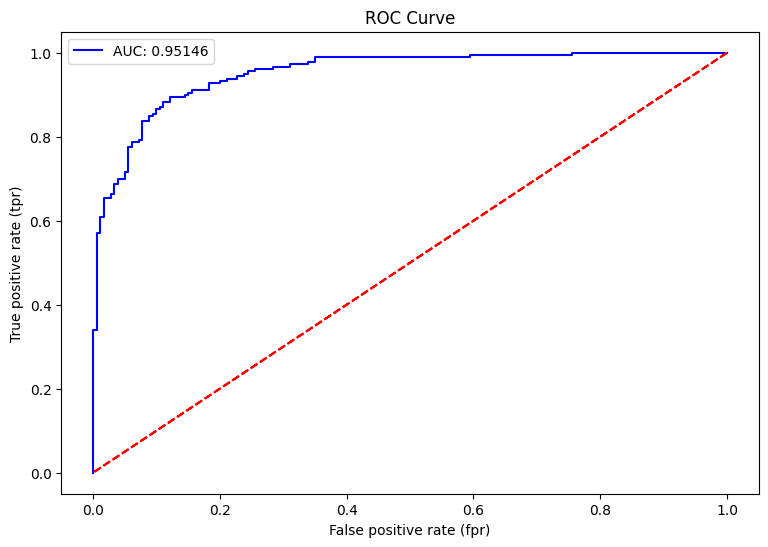

In [12]:
#Plots the curve for better representation, True positive meaning you have told the user about the quality of the banana then turns out to be true
#Additionally, false positive being you told the user about the quality of the banana then turns out to be false.
plt.figure(figsize=(9,6))
plt.plot(fpr, tpr, color="blue", label= f"AUC: {round(roc_auc, 5)}")
plt.plot(y_test, y_test, color="r", linestyle="--")
plt.title("ROC Curve")
plt.xlabel("False positive rate (fpr)")
plt.ylabel("True positive rate (tpr)")
plt.legend()
plt.show()